In [1]:
#import tensorflow as tf
##import tensorflow_hub as hub
#import tensorflow_text
#import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN,AgglomerativeClustering,KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
date = pd.read_csv("date/reviews_mixed.csv",delimiter=",")

date_X = date[date.columns[0]].tolist()

date_Y = date[date.columns[1]].tolist()
date_Y = [1 if el=="positive" else 0 for el in date_Y]

date[:5]

,Text,Sentiment
0,"The rooms are extremely small, practically onl...",negative
1,Room safe did not work.,negative
2,Mattress very comfortable.,positive
3,"Very uncomfortable, thin mattress, with plasti...",negative
4,No bathroom in room,negative


In [3]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
#sbert_model = SentenceTransformer('all-mpnet-base-v2')

train_X_embeded = sbert_model.encode(date_X)

c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


## Agglomerative Clustering

Accuracy:  0.8647342995169082


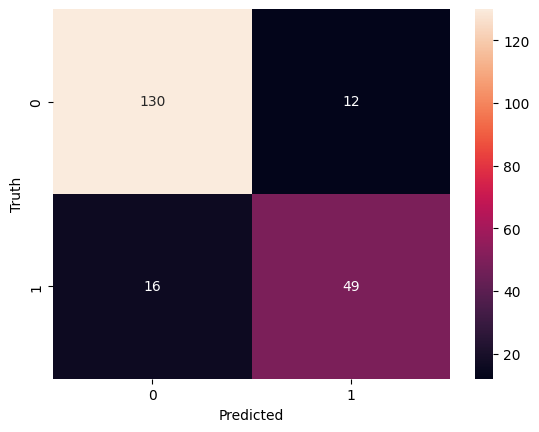

In [4]:
# Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=2).fit(train_X_embeded)

print("Accuracy: ", accuracy_score(date_Y, clustering.labels_))

cm = confusion_matrix(date_Y, clustering.labels_)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## DBSCAN

Accuracy:  0.6859903381642513


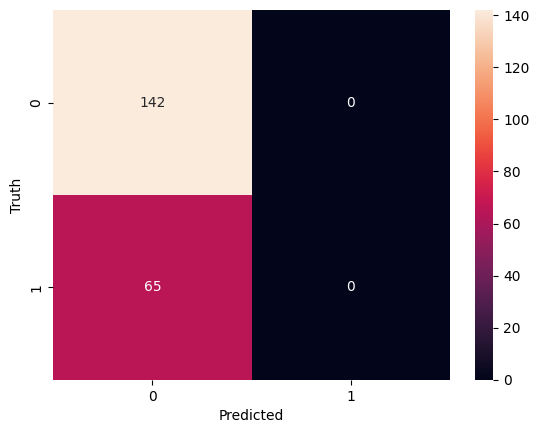

In [5]:
clustering = DBSCAN(eps=17,min_samples=4).fit(train_X_embeded)

print("Accuracy: ", accuracy_score(date_Y, clustering.labels_))

cm = confusion_matrix(date_Y, clustering.labels_)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## GMM

Accuracy:  0.15942028985507245


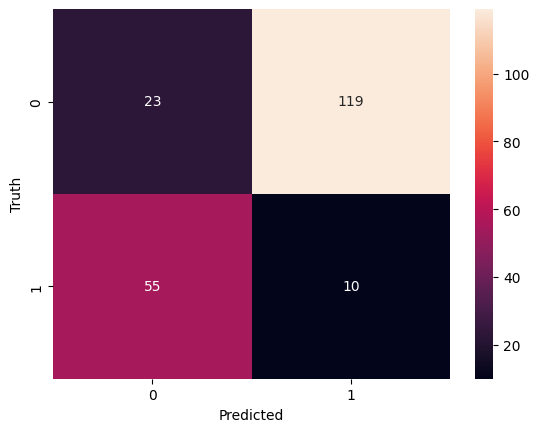

In [6]:
# GMM
clustering = GaussianMixture(n_components=2).fit(train_X_embeded)

labels = clustering.predict(train_X_embeded)

print("Accuracy: ", accuracy_score(date_Y, labels))

cm = confusion_matrix(date_Y, labels)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## K-Means

Accuracy:  0.14492753623188406


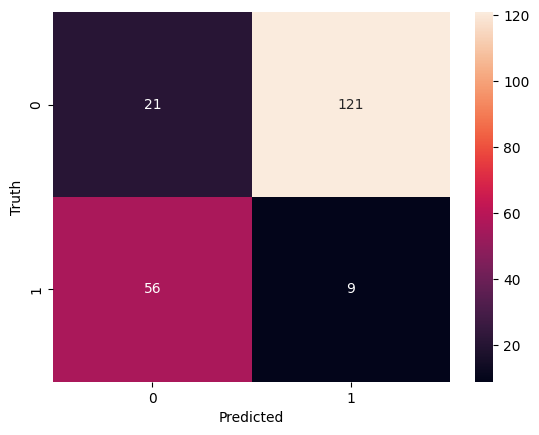

In [7]:
kmeans = KMeans(n_clusters=2).fit(train_X_embeded)

print("Accuracy: ", accuracy_score(date_Y, kmeans.labels_))

cm = confusion_matrix(date_Y, kmeans.labels_)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)

date_X_stopword = list(map(remove_stop_words,date_X))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RoscaMitrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy:  0.714975845410628


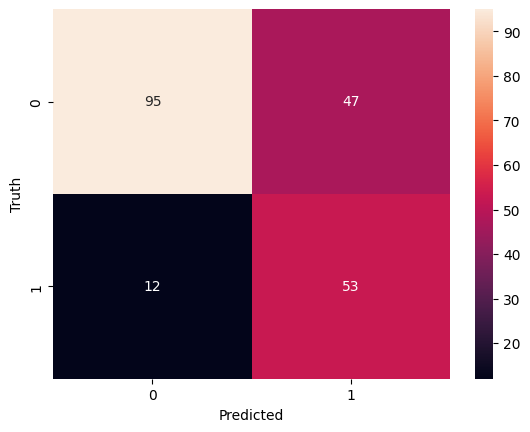

In [9]:
embeded_X_stopword = sbert_model.encode(date_X_stopword)

kmeans2 = KMeans(n_clusters=2).fit(embeded_X_stopword)

print("Accuracy: ", accuracy_score(date_Y, kmeans2.labels_))

cm = confusion_matrix(date_Y, kmeans2.labels_)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## KNN

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_X_embeded, date_Y, test_size=0.2)

In [11]:
classifier = KNeighborsClassifier(n_neighbors=5, p=13, metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', p=13)

acc:  0.8809523809523809
f1:  [0.92307692 0.73684211]


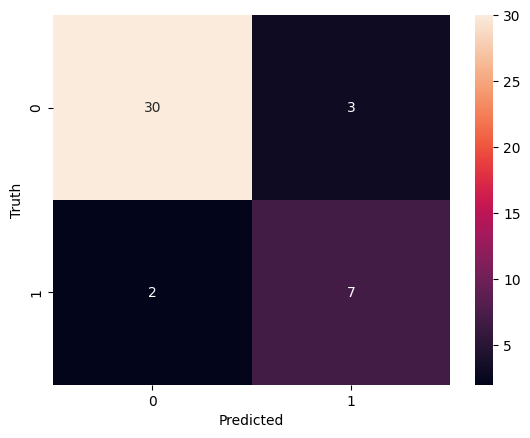

In [12]:
predicted = classifier.predict(X_test)

print("acc: ", accuracy_score(y_test, predicted))
print("f1: ",f1_score(y_test, predicted,average=None))

cm = confusion_matrix(y_test,predicted)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()